In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Lecture des fichiers github de résultats entre 2005 et 2022


atp_matches_2005 = pd.read_csv('atp_matches_2005.csv')
atp_matches_2006 = pd.read_csv('atp_matches_2006.csv')
atp_matches_2007 = pd.read_csv('atp_matches_2007.csv')
atp_matches_2008 = pd.read_csv('atp_matches_2008.csv')
atp_matches_2009 = pd.read_csv('atp_matches_2009.csv')
atp_matches_2010 = pd.read_csv('atp_matches_2010.csv')
atp_matches_2011 = pd.read_csv('atp_matches_2011.csv')
atp_matches_2012 = pd.read_csv('atp_matches_2012.csv')
atp_matches_2013 = pd.read_csv('atp_matches_2013.csv')
atp_matches_2014 = pd.read_csv('atp_matches_2014.csv')
atp_matches_2015 = pd.read_csv('atp_matches_2015.csv')
atp_matches_2016 = pd.read_csv('atp_matches_2016.csv')
atp_matches_2017 = pd.read_csv('atp_matches_2017.csv')
atp_matches_2018 = pd.read_csv('atp_matches_2018.csv')
atp_matches_2019 = pd.read_csv('atp_matches_2019.csv')
atp_matches_2020 = pd.read_csv('atp_matches_2020.csv')


# Concaténation des tableaux en un seul dataframe

atpdata_github = pd.concat([atp_matches_2009, atp_matches_2010, atp_matches_2011, atp_matches_2012,
                            atp_matches_2013, atp_matches_2014, atp_matches_2015, atp_matches_2016,
                            atp_matches_2017, atp_matches_2018, atp_matches_2019, atp_matches_2020
                            ], join = 'outer',ignore_index=True)



# Suppression des colonnes non nécessaires
atpdata_github.drop(columns=['draw_size','winner_seed','winner_entry','loser_seed','loser_entry'], inplace=True)
atpdata_github.rename(columns={'tourney_date':'Date'}, inplace=True)
atpdata_github['Date'] = pd.to_datetime(atpdata_github['Date'], format='%Y%m%d')


In [ ]:
import pandas as pd
#Export des données de température pour Paris

temp_paris09 = pd.read_csv('export-paris2009.csv', skiprows=3)
temp_paris10 = pd.read_csv('export-paris2010.csv', skiprows=3)
temp_paris11 = pd.read_csv('export-paris2011.csv', skiprows=3)
temp_paris12 = pd.read_csv('export-paris2012.csv', skiprows=3)
temp_paris13 = pd.read_csv('export-paris2013.csv', skiprows=3)
temp_paris14 = pd.read_csv('export-paris2014.csv', skiprows=3)
temp_paris15 = pd.read_csv('export-paris2015.csv', skiprows=3)
temp_paris16 = pd.read_csv('export-paris2016.csv', skiprows=3)
temp_paris17 = pd.read_csv('export-paris2017.csv', skiprows=3)
temp_paris18 = pd.read_csv('export-paris2018.csv', skiprows=3)
temp_paris19 = pd.read_csv('export-paris2019.csv', skiprows=3)
temp_paris20 = pd.read_csv('export-paris2020.csv', skiprows=3)
temp_paris21 = pd.read_csv('export-paris2021.csv', skiprows=3)
temp_paris22 = pd.read_csv('export-paris2022.csv', skiprows=3)

#Export des données de température pour Londres

temp_londres09 = pd.read_csv('export-londres2009.csv', skiprows=3)
temp_londres10 = pd.read_csv('export-londres2010.csv', skiprows=3)
temp_londres11 = pd.read_csv('export-londres2011.csv', skiprows=3)
temp_londres12 = pd.read_csv('export-londres2012.csv', skiprows=3)
temp_londres13 = pd.read_csv('export-londres2013.csv', skiprows=3)
temp_londres14 = pd.read_csv('export-londres2014.csv', skiprows=3)
temp_londres15 = pd.read_csv('export-londres2015.csv', skiprows=3)
temp_londres16 = pd.read_csv('export-londres2016.csv', skiprows=3)
temp_londres17 = pd.read_csv('export-londres2017.csv', skiprows=3)
temp_londres18 = pd.read_csv('export-londres2018.csv', skiprows=3)
temp_londres19 = pd.read_csv('export-londres2019.csv', skiprows=3)
temp_londres20 = pd.read_csv('export-londres2020.csv', skiprows=3)
temp_londres21 = pd.read_csv('export-londres2021.csv', skiprows=3)
temp_londres22 = pd.read_csv('export-londres2022.csv', skiprows=3)

#Export des données de température pour New-york

temp_newyork09 = pd.read_csv('export-new-york2009.csv', skiprows=3)
temp_newyork10 = pd.read_csv('export-new-york2010.csv', skiprows=3)
temp_newyork11 = pd.read_csv('export-new-york2011.csv', skiprows=3)
temp_newyork12 = pd.read_csv('export-new-york2012.csv', skiprows=3)
temp_newyork13 = pd.read_csv('export-new-york2013.csv', skiprows=3)
temp_newyork14 = pd.read_csv('export-new-york2014.csv', skiprows=3)
temp_newyork15 = pd.read_csv('export-new-york2015.csv', skiprows=3)
temp_newyork16 = pd.read_csv('export-new-york2016.csv', skiprows=3)
temp_newyork17 = pd.read_csv('export-new-york2017.csv', skiprows=3)
temp_newyork18 = pd.read_csv('export-new-york2018.csv', skiprows=3)
temp_newyork19 = pd.read_csv('export-new-york2019.csv', skiprows=3)
temp_newyork20 = pd.read_csv('export-new-york2020.csv', skiprows=3)
temp_newyork21 = pd.read_csv('export-new-york2021.csv', skiprows=3)
temp_newyork22 = pd.read_csv('export-new-york2022.csv', skiprows=3)

#Export des données de température pour Melbourne

temp_melbourne09 = pd.read_csv('export-melbourne2009.csv', skiprows=3)
temp_melbourne10 = pd.read_csv('export-melbourne2010.csv', skiprows=3)
temp_melbourne11 = pd.read_csv('export-melbourne2011.csv', skiprows=3)
temp_melbourne12 = pd.read_csv('export-melbourne2012.csv', skiprows=3)
temp_melbourne13 = pd.read_csv('export-melbourne2013.csv', skiprows=3)
temp_melbourne14 = pd.read_csv('export-melbourne2014.csv', skiprows=3)
temp_melbourne15 = pd.read_csv('export-melbourne2015.csv', skiprows=3)
temp_melbourne16 = pd.read_csv('export-melbourne2016.csv', skiprows=3)
temp_melbourne17 = pd.read_csv('export-melbourne2017.csv', skiprows=3)
temp_melbourne18 = pd.read_csv('export-melbourne2018.csv', skiprows=3)
temp_melbourne19 = pd.read_csv('export-melbourne2019.csv', skiprows=3)
temp_melbourne20 = pd.read_csv('export-melbourne2020.csv', skiprows=3)
temp_melbourne21 = pd.read_csv('export-melbourne2021.csv', skiprows=3)
temp_melbourne22 = pd.read_csv('export-melbourne2022.csv', skiprows=3)

# Fusion des dataframes de données météo de Sydney entre 2009 et 2022

list_temp_melbourne =[temp_melbourne09, temp_melbourne10, temp_melbourne11, temp_melbourne12, temp_melbourne13,
                        temp_melbourne14, temp_melbourne15, temp_melbourne16, temp_melbourne17, temp_melbourne18,
                        temp_melbourne19, temp_melbourne20]
temp_melbourne = pd.concat(list_temp_melbourne)

# Fusion des dataframes de données météo de Paris entre 2009 et 2022

list_temp_paris =[temp_paris09, temp_paris10, temp_paris11, temp_paris12, temp_paris13,
                        temp_paris14, temp_paris15, temp_paris16, temp_paris17, temp_paris18,
                        temp_paris19, temp_paris20]

temp_paris = pd.concat(list_temp_paris)

# Fusion des dataframes de données météo de Londres entre 2009 et 2022

list_temp_londres =[temp_londres09, temp_londres10, temp_londres11, temp_londres12, temp_londres13,
                        temp_londres14, temp_londres15, temp_londres16, temp_londres17, temp_londres18,
                        temp_londres19, temp_londres20]


temp_londres = pd.concat(list_temp_londres)

# Fusion des dataframes de données météo de New-York entre 2009 et 2022

list_temp_newyork =[temp_newyork09, temp_newyork10, temp_newyork11, temp_newyork12, temp_newyork13,
                        temp_newyork14, temp_newyork15, temp_newyork16, temp_newyork17, temp_newyork18,
                        temp_newyork19, temp_newyork20]

temp_newyork = pd.concat(list_temp_newyork)

In [ ]:
# Ajout d'une colonne 'Location' avec comme valeur 'Paris' dans le dataframe temp_paris
temp_paris = temp_paris.assign(tourney_name='Roland Garros')

# Ajout d'une colonne 'Location' avec comme valeur 'London' dans le dataframe temp_paris
temp_londres = temp_londres.assign(tourney_name='Wimbledon')

# Ajout d'une colonne 'Location' avec comme valeur 'New York' dans le dataframe temp_newyork
temp_newyork = temp_newyork.assign(tourney_name='US Open')

# Ajout d'une colonne 'Location' avec comme valeur 'Melbourne' dans le dataframe temp_sydney
temp_melbourne = temp_melbourne.assign(tourney_name='Australian Open')

#Renommer la colonne DATE en Date
temp_melbourne = temp_melbourne.rename(columns={'DATE': 'Date'})
temp_melbourne['Date'] = pd.to_datetime(temp_melbourne['Date'], format='%Y-%m-%d')

temp_paris = temp_paris.rename(columns={'DATE': 'Date'})
temp_paris['Date'] = pd.to_datetime(temp_paris['Date'], format='%Y-%m-%d')

temp_newyork = temp_newyork.rename(columns={'DATE': 'Date'})
temp_newyork['Date'] = pd.to_datetime(temp_newyork['Date'], format='%Y-%m-%d')

temp_londres = temp_londres.rename(columns={'DATE': 'Date'})
temp_londres['Date'] = pd.to_datetime(temp_londres['Date'], format='%Y-%m-%d')


# Suppression des colonnes non utiles

temp_melbourne = temp_melbourne.drop(columns=['HEATINDEX_MAX_C','PRECIP_TOTAL_DAY_MM','MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
                                        'VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT',
                                        'DEWPOINT_MAX_C','WINDTEMP_MAX_C','WEATHER_CODE_MORNING',
                                        'WEATHER_CODE_NOON','WEATHER_CODE_EVENING','TOTAL_SNOW_MM',
                                        'UV_INDEX','SUNHOUR','OPINION', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C','WINDSPEED_MAX_KMH'])

temp_paris = temp_paris.drop(columns=['HEATINDEX_MAX_C','PRECIP_TOTAL_DAY_MM','MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
                                        'VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT',
                                        'DEWPOINT_MAX_C','WINDTEMP_MAX_C','WEATHER_CODE_MORNING',
                                        'WEATHER_CODE_NOON','WEATHER_CODE_EVENING','TOTAL_SNOW_MM',
                                        'UV_INDEX','SUNHOUR','OPINION', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C','WINDSPEED_MAX_KMH'])

temp_londres = temp_londres.drop(columns=['HEATINDEX_MAX_C','PRECIP_TOTAL_DAY_MM','MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
                                        'VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT',
                                        'DEWPOINT_MAX_C','WINDTEMP_MAX_C','WEATHER_CODE_MORNING',
                                        'WEATHER_CODE_NOON','WEATHER_CODE_EVENING','TOTAL_SNOW_MM',
                                        'UV_INDEX','SUNHOUR','OPINION', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C','WINDSPEED_MAX_KMH'])

temp_newyork = temp_newyork.drop(columns=['HEATINDEX_MAX_C','PRECIP_TOTAL_DAY_MM','MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C',
                                        'VISIBILITY_AVG_KM','PRESSURE_MAX_MB','CLOUDCOVER_AVG_PERCENT',
                                        'DEWPOINT_MAX_C','WINDTEMP_MAX_C','WEATHER_CODE_MORNING',
                                        'WEATHER_CODE_NOON','WEATHER_CODE_EVENING','TOTAL_SNOW_MM',
                                        'UV_INDEX','SUNHOUR','OPINION', 'SUNSET', 'SUNRISE', 'TEMPERATURE_NIGHT_C','WINDSPEED_MAX_KMH'])

# Fusionner les DataFrames en utilisant une jointure gauche
atpdatanew = atpdata_github.merge(temp_paris, on=['Date', 'tourney_name'], how='left')
atpdatanew1 = atpdatanew.merge(temp_londres, on=['Date', 'tourney_name',], how='left')

# Remplacer les valeurs de 'MAX_TEMPERATURE_C_x' par les valeurs de 'MAX_TEMPERATURE_C_y' pour les lignes avec Location == 'Londres'
# Puis faire de même pour 'HUMIDITY_MAX_PERCENT_x'
Londres_rows = atpdatanew1[atpdatanew1['tourney_name'] == 'Wimbledon']
atpdatanew1.loc[Londres_rows.index, 'MAX_TEMPERATURE_C_x'] = Londres_rows['MAX_TEMPERATURE_C_y']
atpdatanew1.loc[Londres_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = Londres_rows['HUMIDITY_MAX_PERCENT_y']
atpdatanew1.drop(columns={'MAX_TEMPERATURE_C_y','HUMIDITY_MAX_PERCENT_y'},inplace = True)

#
atpdatanew2 = atpdatanew1.merge(temp_newyork, on=['Date', 'tourney_name'], how='left')
newyork_rows = atpdatanew2[atpdatanew2['tourney_name'] == 'US Open']
atpdatanew2.loc[newyork_rows.index, 'MAX_TEMPERATURE_C_x'] = newyork_rows['MAX_TEMPERATURE_C']
atpdatanew2.loc[newyork_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = newyork_rows['HUMIDITY_MAX_PERCENT']
atpdatanew2.drop(columns={'MAX_TEMPERATURE_C','HUMIDITY_MAX_PERCENT'},inplace = True)

#
atpdatanew3 = atpdatanew2.merge(temp_melbourne, on=['Date', 'tourney_name'], how='left')
melbourne_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Australian Open']
atpdatanew3.loc[melbourne_rows.index, 'MAX_TEMPERATURE_C_x'] = melbourne_rows['MAX_TEMPERATURE_C']
atpdatanew3.loc[melbourne_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = melbourne_rows['HUMIDITY_MAX_PERCENT']

atpdatanew3.drop(columns={'MAX_TEMPERATURE_C','HUMIDITY_MAX_PERCENT'},inplace = True)
#
madrid_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Madrid Masters']
atpdatanew3.loc[madrid_rows.index, 'MAX_TEMPERATURE_C_x'] = 18
atpdatanew3.loc[madrid_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 80

#
rome_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Rome Masters']
atpdatanew3.loc[rome_rows.index, 'MAX_TEMPERATURE_C_x'] = 24
atpdatanew3.loc[rome_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 60

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Paris Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 13
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 69

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Miami Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 25
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 76

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Canada Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 26
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 66


#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Cincinnati Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 24
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 65

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Indian Wells Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 27
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 33

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Monte Carlo Masters']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 16
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 75

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Barcelona']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 13
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 75

#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Washington']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 27
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 66


#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == "Queen's Club"]
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 16
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 68


#
x_rows = atpdatanew3[atpdatanew3['tourney_name'] == 'Halle']
atpdatanew3.loc[x_rows.index, 'MAX_TEMPERATURE_C_x'] = 18
atpdatanew3.loc[x_rows.index, 'HUMIDITY_MAX_PERCENT_x'] = 65


# Liste des tournois retenus
tournois_autorises = ['Roland Garros','Wimbledon','US Open','Australian Open','Halle', 'Queen\'s Club', 'Washington', 'Barcelona', 'Monte Carlo Masters', 'Indian Wells Masters', 'Cincinnati Masters', 'Canada Masters', 'Miami Masters', 'Paris Masters', 'Rome Masters', 'Madrid Masters']

# Filtrer le DataFrame pour inclure uniquement les tournois retenus
atpdatanew3 = atpdatanew3[atpdatanew3['tourney_name'].isin(tournois_autorises)]

atpdatafinal = atpdatanew3.dropna()

atpdatafinal.drop(columns={'tourney_id','loser_id','winner_id','match_num','score'},inplace = True)


# Liste des colonnes vainqueur à renommer
columns_to_rename = {
    'winner_name': 'P1',
    'winner_hand': 'P1_hand',
    'winner_ht': 'P1_ht',
    'winner_ioc': 'P1_ioc',
    'winner_age': 'P1_age',
    'w_ace' : 'P1_ace',
    'w_df' : 'P1_df',
    'w_1stIn' : 'P1_1stIn',
    'w_1stWon' : 'P1_1stWon',
    'w_2ndWon' : 'P1_2ndWon',
      'w_SvGms' : 'P1_SvGms',
     'w_bpSaved' : 'P1_bpSaved',
     'w_bpFaced' : 'P1_bpFaced',
    'winner_rank' :'P1_rank',
    'winner_rank_points' : 'P1_rank_pts',
    'w_svpt' : 'P1_svpt'
}

# Liste des colonnes loser à renommer
columns_to_rename2 = {'loser_name': 'P2',
    'loser_hand': 'P2_hand',
    'loser_ht': 'P2_ht',
    'loser_ioc': 'P2_ioc',
    'loser_age': 'P2_age',
    'l_ace' : 'P2_ace',
    'l_df' : 'P2_df',
    'l_1stIn' : 'P2_1stIn',
    'l_1stWon' : 'P2_1stWon',
    'l_2ndWon' : 'P2_2ndWon',
      'l_SvGms' : 'P2_SvGms',
     'l_bpSaved' : 'P2_bpSaved',
     'l_bpFaced' : 'P2_bpFaced',
    'loser_rank' :'P2_rank',
    'loser_rank_points' : 'P2_rank_pts',
    'l_svpt' : 'P2_svpt'}

# Renommer les colonnes
atpdatafinal.rename(columns=columns_to_rename, inplace=True)
atpdatafinal.rename(columns=columns_to_rename2, inplace=True)


# Créer une nouvelle colonne result
atpdatafinal['result'] = atpdatafinal['P1']


# Liste des colonnes correspondantes pour P1
colonnes_P1 = ['P1', 'P1_hand', 'P1_ht', 'P1_ioc', 'P1_age', 'P1_ace', 'P1_SvGms', 'P1_bpSaved', 'P1_bpFaced',
               'P1_rank', 'P1_rank_pts', 'P1_df', 'P1_svpt',  'P1_1stIn', 'P1_1stWon', 'P1_2ndWon']

# Liste des colonnes correspondantes pour P2
colonnes_P2 = ['P2','P2_hand','P2_ht','P2_ioc','P2_age','P2_ace', 'P2_SvGms', 'P2_bpSaved','P2_bpFaced','P2_rank', 'P2_rank_pts', 'P2_df', 'P2_svpt' , 'P2_1stIn', 'P2_1stWon', 'P2_2ndWon' ]

# Créer une copie du DataFrame
copie_atpdatafinal = atpdatafinal.copy()

# Inverser les valeurs entre colonnes_P1 et colonnes_P2 dans la copie
for colonnes_P1, colonnes_P2 in zip(colonnes_P1, colonnes_P2):
    # Échanger les valeurs entre P1 et P2
    copie_atpdatafinal[colonnes_P1], copie_atpdatafinal[colonnes_P2] = (
        copie_atpdatafinal[colonnes_P2].values,
        copie_atpdatafinal[colonnes_P1].values
    )


# Concaténer les deux DataFrames
merged_atpdatafinal = pd.concat([atpdatafinal, copie_atpdatafinal])

# Trier par la date dans l'ordre croissant
merged_atpdatafinal = merged_atpdatafinal.sort_values(by='Date', ascending=True)


# Remplacez les valeurs de 'result' par 1 si elles sont égales à 'P1'
merged_atpdatafinal['result'] = np.where(merged_atpdatafinal['result'] == merged_atpdatafinal['P1'], 1, merged_atpdatafinal['result'])

# Remplacez les valeurs de 'result' par -1 si elles sont égales à 'P2'
merged_atpdatafinal['result'] = np.where(merged_atpdatafinal['result'] == merged_atpdatafinal['P2'], -1, merged_atpdatafinal['result'])

merged_atpdatafinal = merged_atpdatafinal.sort_values(by=['P1', 'Date'], ascending=[True, True])


# Compter le nombre d'occurrences de chaque joueur dans la colonne 'P1'
counts = merged_atpdatafinal['P1'].value_counts()

# Sélectionner les joueurs qui apparaissent au moins 10 fois
selected_players = counts[counts >= 10].index

# Filtrer le DataFrame pour inclure uniquement les joueurs sélectionnés
merged_atpdatafinal_filtered = merged_atpdatafinal[merged_atpdatafinal['P1'].isin(selected_players)]


# Liste des colonnes pour lesquelles vous voulez calculer la moyenne mobile
colonnes_moyenne = ['P1_rank', 'P1_rank_pts', 'P2_rank', 'P2_rank_pts', 'P1_ace', 'P1_df', 'P1_svpt', 'P2_svpt',
                    'P1_1stIn', 'P1_1stWon', 'P1_2ndWon', 'P1_SvGms', 'P1_bpSaved', 'P1_bpFaced', 'P2_ace', 'P2_df',
                    'P2_svpt', 'P2_1stIn', 'P2_1stWon', 'P2_2ndWon', 'P2_SvGms', 'P2_bpSaved', 'P2_bpFaced']

# Grouper par 'P1' et 'surface', puis calculer la moyenne mobile sur les 5 matchs précédents pour chaque colonne
for col in colonnes_moyenne:
    merged_atpdatafinal_filtered[f'{col}_moy'] = merged_atpdatafinal_filtered.groupby('P1')[col].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)


# Trier à nouveau le DataFrame par ordre croissant de la colonne 'Date'
merged_atpdatafinal_filtered = merged_atpdatafinal_filtered.sort_values(by='Date')

# Réinitialiser l'index si nécessaire
merged_atpdatafinal_filtered = merged_atpdatafinal_filtered.reset_index(drop=True)



merged_atpdatafinal_filtered['Year'] = merged_atpdatafinal_filtered['Date'].dt.year
merged_atpdatafinal_filtered['Month'] = merged_atpdatafinal_filtered['Date'].dt.month
merged_atpdatafinal_filtered['Day'] = merged_atpdatafinal_filtered['Date'].dt.day

# Supprimer la colonne Date si elle n'est plus nécessaire
merged_atpdatafinal_filtered = merged_atpdatafinal_filtered.drop(columns=['Date'])


colonnes_a_supprimer = ['P1_rank', 'P1_rank_pts', 'P2_rank', 'P2_rank_pts', 'P1_ace', 'P1_df', 'P1_svpt', 'P2_svpt',
                        'P1_1stIn', 'P1_1stWon', 'P1_2ndWon', 'P1_SvGms', 'P1_bpSaved', 'P1_bpFaced', 'P2_ace', 'P2_df',
                        'P2_svpt', 'P2_1stIn', 'P2_1stWon', 'P2_2ndWon', 'P2_SvGms', 'P2_bpSaved', 'P2_bpFaced']

merged_atpdatafinal_filtered = merged_atpdatafinal_filtered.drop(columns=colonnes_a_supprimer)


# Repérer les colonnes catégorielles
colonnes_categorielles = merged_atpdatafinal_filtered.select_dtypes(include=['object']).columns


merged_atpdatafinal_filtered['result'] = merged_atpdatafinal_filtered['result'].astype(float)

merged_atpdatafinal_filtered = merged_atpdatafinal_filtered[merged_atpdatafinal_filtered['P2_hand'] != 'U']



<ipython-input-9-9f7658b794c1>:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atpdatafinal.drop(columns={'tourney_id','loser_id','winner_id','match_num','score'},inplace = True)
<ipython-input-9-9f7658b794c1>:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atpdatafinal.rename(columns=columns_to_rename, inplace=True)
<ipython-input-9-9f7658b794c1>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atpdatafinal.rename(columns=colu

In [ ]:
def filter_by_player(df, player_name):
    return df[(df['P1'] == player_name) | (df['P2'] == player_name)]


# Utilisation de la fonction avec le nom du joueur
player_name = 'Rafael Nadal'
filtered_atpdf = filter_by_player(merged_atpdatafinal_filtered, player_name)
print(filtered_atpdf[['P1', 'P2']])


# Colonnes catégorielles
cat = ['tourney_name', 'surface', 'tourney_level', 'P1', 'P1_hand', 'P1_ioc',
       'P2', 'P2_hand', 'P2_ioc', 'round']

# Utiliser get_dummies pour encoder ces colonnes
filtered_atpdf_encoded = pd.get_dummies(filtered_atpdf, columns=cat)


#Séparation des données explicatives de la variable cible

feats = filtered_atpdf_encoded.drop('result', axis=1)
target = filtered_atpdf_encoded['result']

#
variables_num = feats.select_dtypes(include=['int', 'float','datetime64'])


#Séparation du jeu de données en un jeu d'entrainement et de test en spécifiant la répartition temporelle

X_train, X_test, y_train, y_test = train_test_split(
    feats, target,
    test_size=0.15,
    random_state=42,
    shuffle=False)

#Standardiser les valeurs numériques à l'aide de StandardScaler

sc = StandardScaler()
variables_num_list = variables_num.columns.tolist()
X_train[variables_num_list] = sc.fit_transform(X_train[variables_num_list])
X_test[variables_num_list] = sc.transform(X_test[variables_num_list])

                        P1                 P2
32              Tommy Haas       Rafael Nadal
35            Rafael Nadal         Tommy Haas
36            Rafael Nadal  Fernando Verdasco
37            Rafael Nadal       Gilles Simon
42            Rafael Nadal  Fernando Gonzalez
...                    ...                ...
24822     Alexander Zverev       Rafael Nadal
24829      Jordan Thompson       Rafael Nadal
24830         Rafael Nadal   Alexander Zverev
24862  Pablo Carreno Busta       Rafael Nadal
24898      Feliciano Lopez       Rafael Nadal

[1114 rows x 2 columns]


In [ ]:
#Modèle logisticRegression
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

Score sur ensemble train 0.8757961783439491
Score sur ensemble test 0.6785714285714286


In [ ]:
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))


print(classification_report(y_test, y_pred, ))

Prédiction,-1.0,1.0
Realité,,
-1.0,69,12
1.0,12,75


              precision    recall  f1-score   support

        -1.0       0.85      0.85      0.85        81
         1.0       0.86      0.86      0.86        87

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.86      0.86      0.86       168



In [ ]:
#Modèle logisticRegression
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression(max_iter=30)
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

Score sur ensemble train 0.9112050739957717
Score sur ensemble test 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


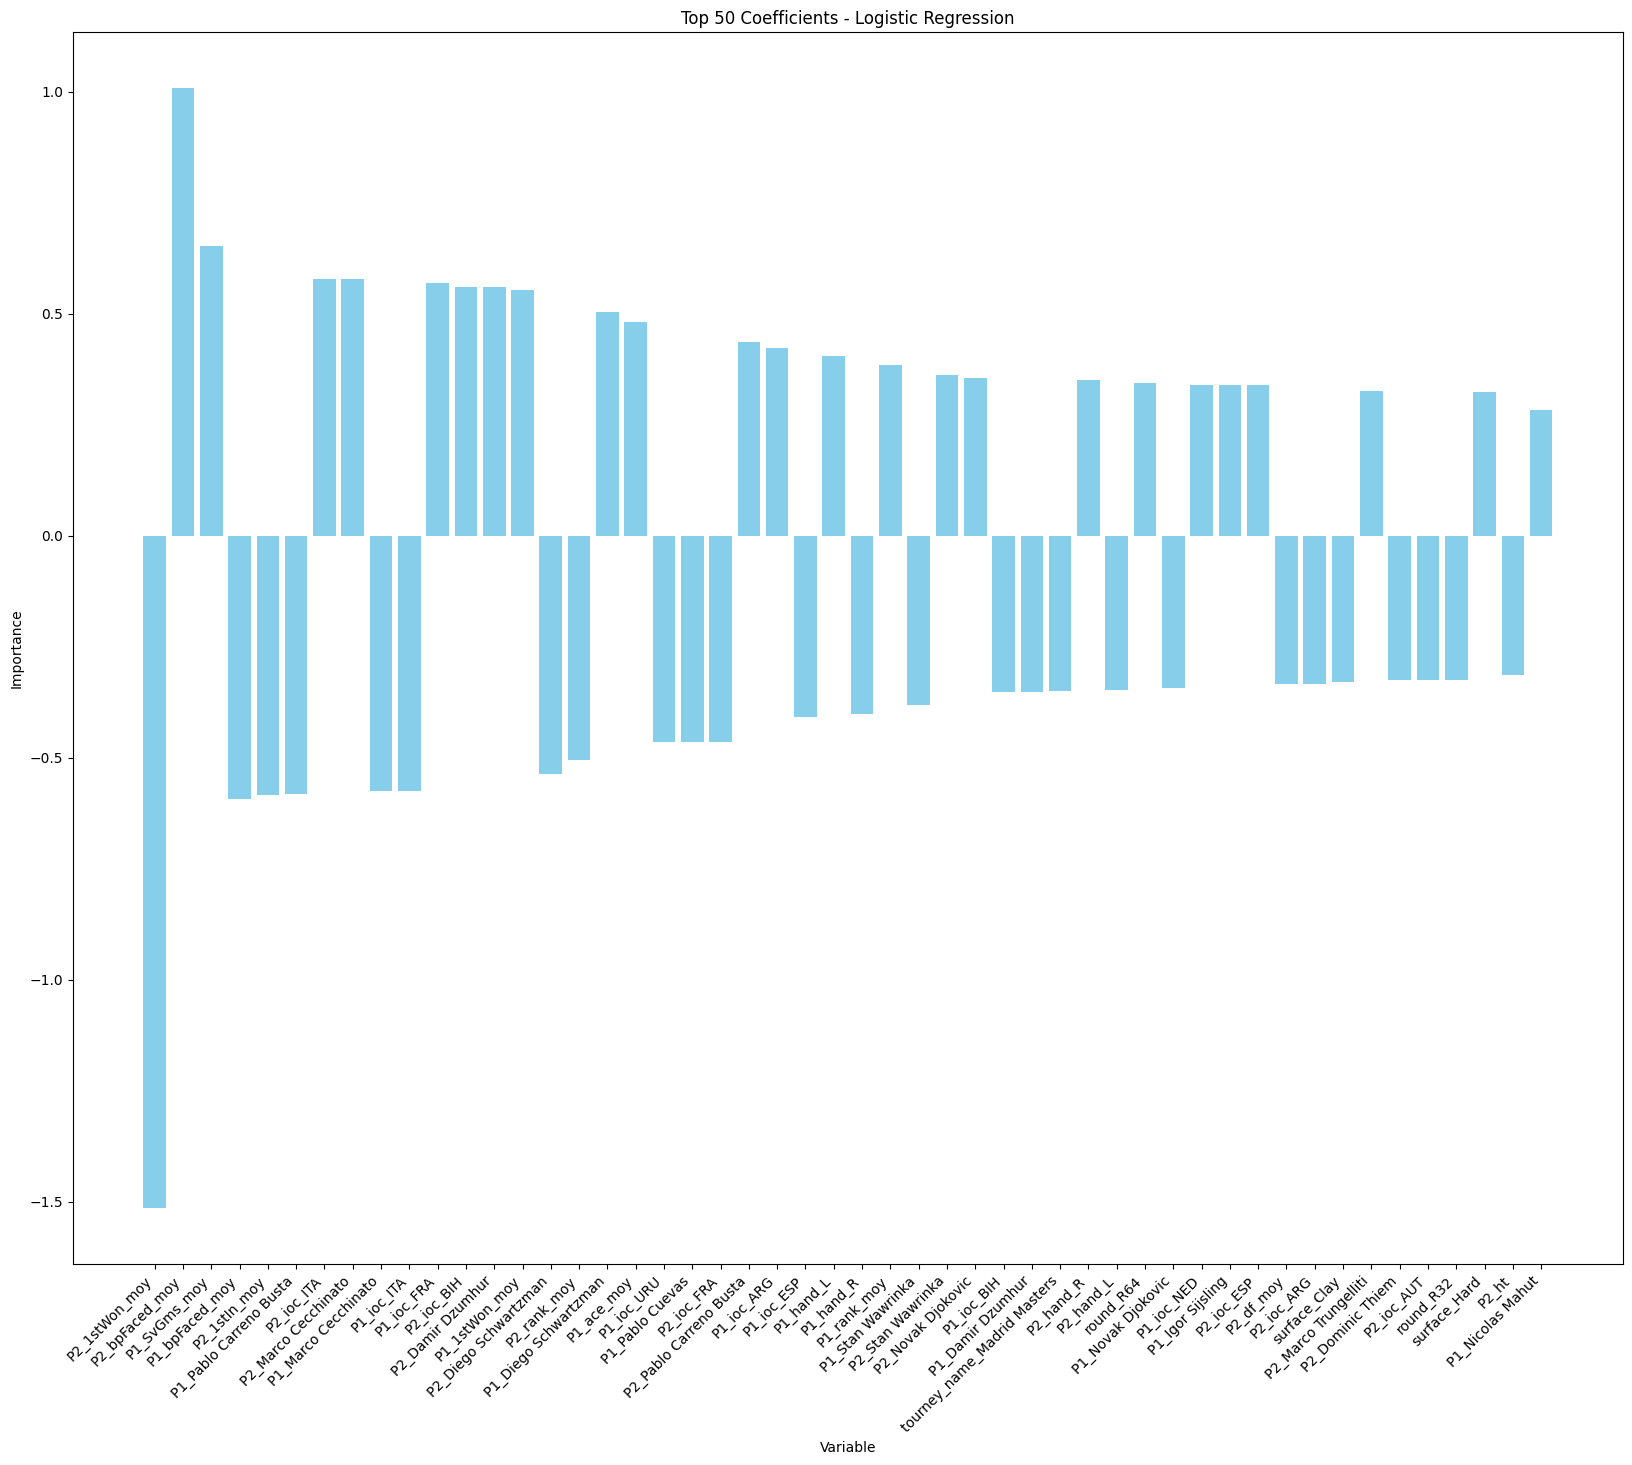

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les coefficients
coefficients = reglog.coef_[0]

# Obtenir les indices des coefficients triés par valeur absolue
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Limiter le nombre de variables à afficher
top_indices = sorted_indices[:50]

# Extraire les noms des variables correspondantes
top_variables = feats.columns[top_indices]

# Extraire les coefficients correspondants
top_coefficients = coefficients[top_indices]

# Créer le graphique à barres avec un espacement entre les barres
plt.figure(figsize=(20, 16))
plt.bar(top_variables, top_coefficients, color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Top 50 Coefficients - Logistic Regression')
plt.xticks(rotation=45)

# Ajuster l'espacement entre les barres
plt.xticks(np.arange(len(top_variables)), top_variables, rotation=45, ha='right')

plt.show()